In [1]:
# Load the packages
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns 

In [2]:
df = pd.read_csv('C:/Users/DELL/Desktop/[RBAC 2023] Round 2 Dataset.csv')

print("Hello World")
print(df.columns.tolist())

Hello World
['Unnamed: 0', 'BillID', 'Channel', 'OrderFrom', 'TransactionDate', 'SalesAmount', 'CustomerID', 'CustomerGender', 'VoucherStatus', 'Province']


In [3]:
df

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,296891.0,1753863,Unknown,No,Ho Chi Minh City
1,1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,301782.0,1124050,Unknown,No,Hanoi
2,2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,319792.0,1626827,Male,No,Hanoi
3,3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,424762.0,125643,Male,No,Hanoi
4,4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,280031.0,2117237,Unknown,No,Hanoi
...,...,...,...,...,...,...,...,...,...,...
1397504,1397504,1397504,Delivery,WEBSITE,2023-07-01 00:00:00+00:00,87103.0,1401593,Unknown,No,Ho Chi Minh City
1397505,1397505,1397505,Take Away,STORE,2023-07-01 00:00:00+00:00,278920.0,1322074,Male,No,Hanoi
1397506,1397506,1397506,Take Away,WEBSITE,2023-07-01 00:00:00+00:00,364872.0,2038523,Unknown,No,Nothern Provinces
1397507,1397507,1397507,Delivery,APP,2023-07-01 00:00:00+00:00,1349201.0,1443231,Male,No,Southern Provinces


In [4]:
# Calculate the Recency of the Customer
from datetime import datetime

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

df['TransactionDate'] = df['TransactionDate'].dt.tz_localize(None)

# print(df['TransactionDate'])

recent_purchase = df.groupby('CustomerID')['TransactionDate'].max()

now = datetime.now().replace(tzinfo=None)
recency = now - recent_purchase
recency = recency.dt.days

recency_df = pd.DataFrame({'CustomerID': recent_purchase.index, 'Recency': recency})

print(recency_df)

            CustomerID  Recency
CustomerID                     
0                    0      687
1                    1      614
8                    8      248
14                  14      168
16                  16      421
...                ...      ...
2174066        2174066      312
2174072        2174072      342
2174073        2174073      272
2174075        2174075      336
2174083        2174083      756

[718169 rows x 2 columns]


In [5]:
# Calculate the Frequency of the customers
frequency = df.groupby('CustomerID')['TransactionDate'].count()

frequency_df = pd.DataFrame({'CustomerID': frequency.index, 'Frequency': frequency})

print(frequency_df)

            CustomerID  Frequency
CustomerID                       
0                    0          1
1                    1          1
8                    8          2
14                  14          1
16                  16          1
...                ...        ...
2174066        2174066          1
2174072        2174072          3
2174073        2174073          1
2174075        2174075          1
2174083        2174083          1

[718169 rows x 2 columns]


In [8]:
# Calculate the monthly/quarterly churn rate
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

df['Period'] = df['TransactionDate'].dt.to_period('M')

first_transaction = df.groupby('CustomerID')['TransactionDate'].min().dt.to_period('M')

unique_customers = df.groupby('Period')['CustomerID'].nunique()

new_customers = df.groupby(['CustomerID', 'Period']).size().groupby(level=1).count()

churn_rate = pd.Series(dtype=float)

for period in df['Period'].unique():
    begin_customers = unique_customers[unique_customers.index < period].sum()
    end_customers = unique_customers[unique_customers.index <= period].sum()
    new_customers_count = new_customers[new_customers.index == period].sum()

    if begin_customers > 0:
        churn = (end_customers - begin_customers - new_customers_count) / begin_customers
        churn_rate.at[period] = churn
    else:
        churn_rate.at[period] = 0

print(churn_rate)

2021-10    0.0
2021-11    0.0
2021-12    0.0
2022-01    0.0
2022-02    0.0
2022-03    0.0
2022-04    0.0
2022-05    0.0
2022-06    0.0
2022-07    0.0
2022-08    0.0
2022-09    0.0
2022-10    0.0
2022-11    0.0
2022-12    0.0
2023-01    0.0
2023-02    0.0
2023-03    0.0
2023-04    0.0
2023-05    0.0
2023-06    0.0
2023-07    0.0
Freq: M, dtype: float64


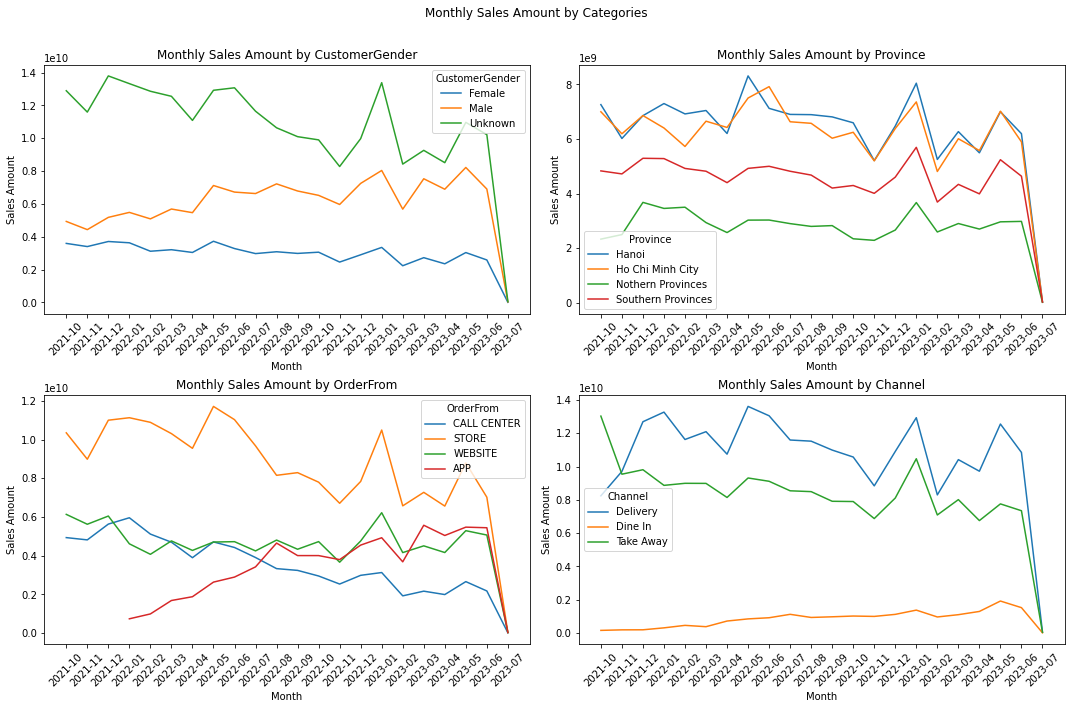

In [17]:
# 4 chart riêng tính tổng sales amount breakdown của 4 mục gender/region/channel/platform dao động theo tháng
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.strftime('%Y-%m')

categories = ['CustomerGender', 'Province', 'OrderFrom', 'Channel']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Monthly Sales Amount by Categories')

for ax, category in zip(axes.flatten(), categories):
    monthly_sales = df.groupby(['Month', category])['SalesAmount'].sum().reset_index()

    sns.lineplot(data=monthly_sales, x='Month', y='SalesAmount', hue=category, ax=ax)
    ax.set_title(f'Monthly Sales Amount by {category}')
    ax.set_ylabel('Sales Amount')
    ax.set_xlabel('Month')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()


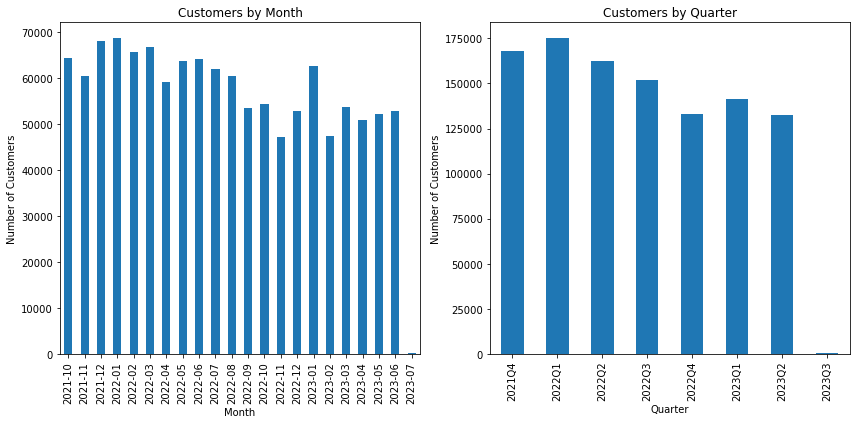

In [19]:
# Monthly/Quarterly total number customer
import pandas as pd

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

df['Month'] = df['TransactionDate'].dt.to_period('M')
customers_by_month = df.groupby('Month')['CustomerID'].nunique()

df['Quarter'] = df['TransactionDate'].dt.to_period('Q')
customers_by_quarter = df.groupby('Quarter')['CustomerID'].nunique()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
customers_by_month.plot(kind='bar')
plt.title('Customers by Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')

plt.subplot(1, 2, 2)
customers_by_quarter.plot(kind='bar')
plt.title('Customers by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

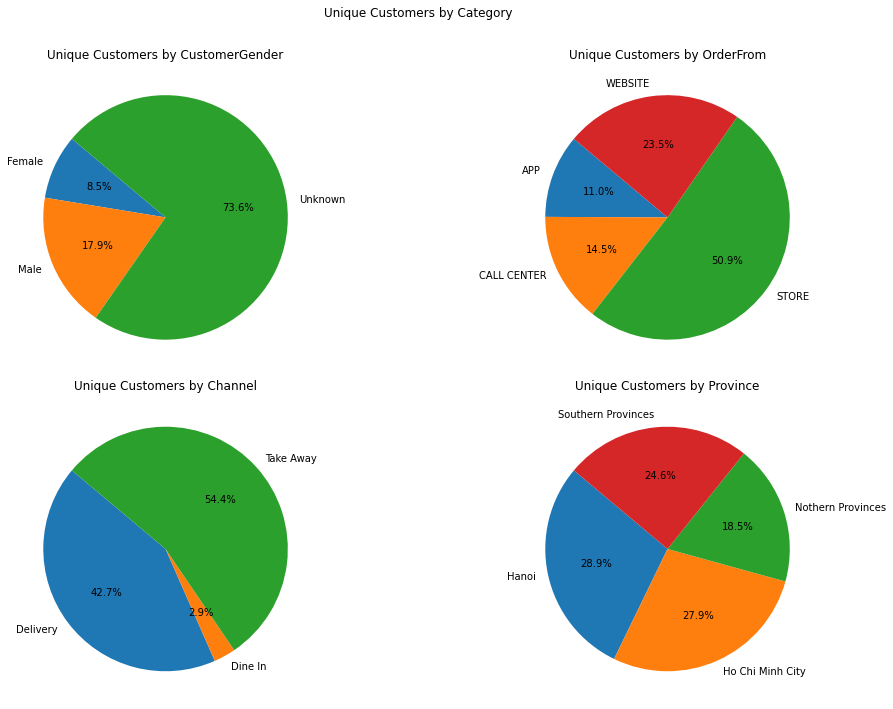

In [22]:
categories = ['CustomerGender', 'OrderFrom', 'Channel', 'Province']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Unique Customers by Category')

for ax, category in zip(axes.flatten(), categories):
    customer_count = df.groupby(category)['CustomerID'].nunique()

    ax.pie(customer_count, labels=customer_count.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Unique Customers by {category}')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

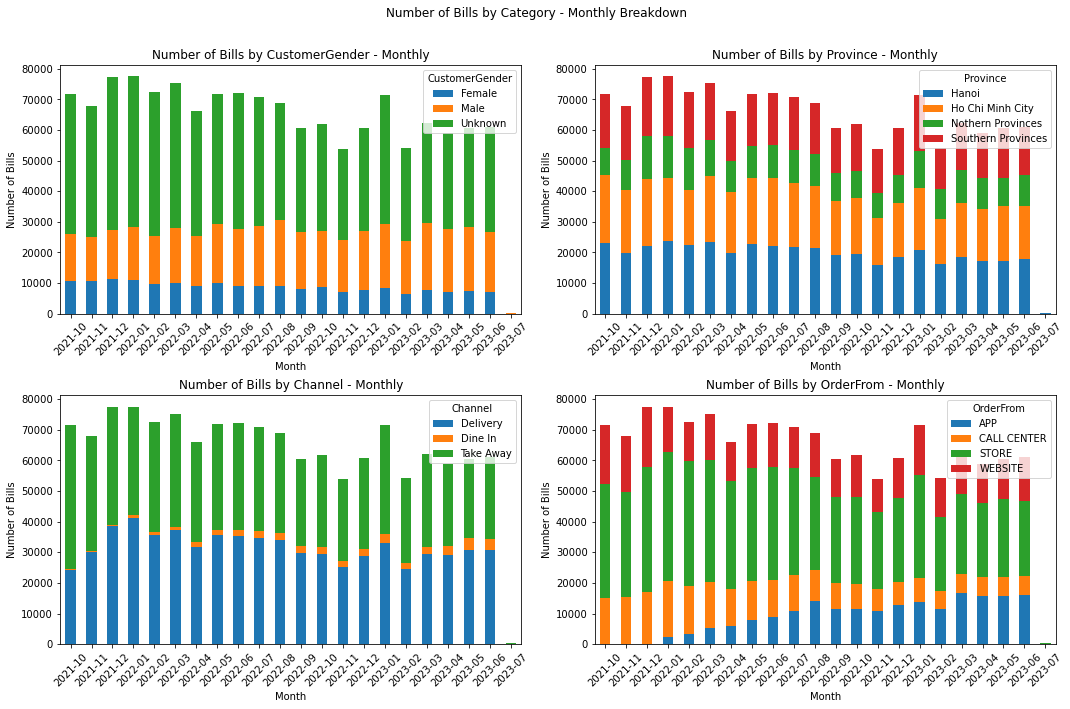

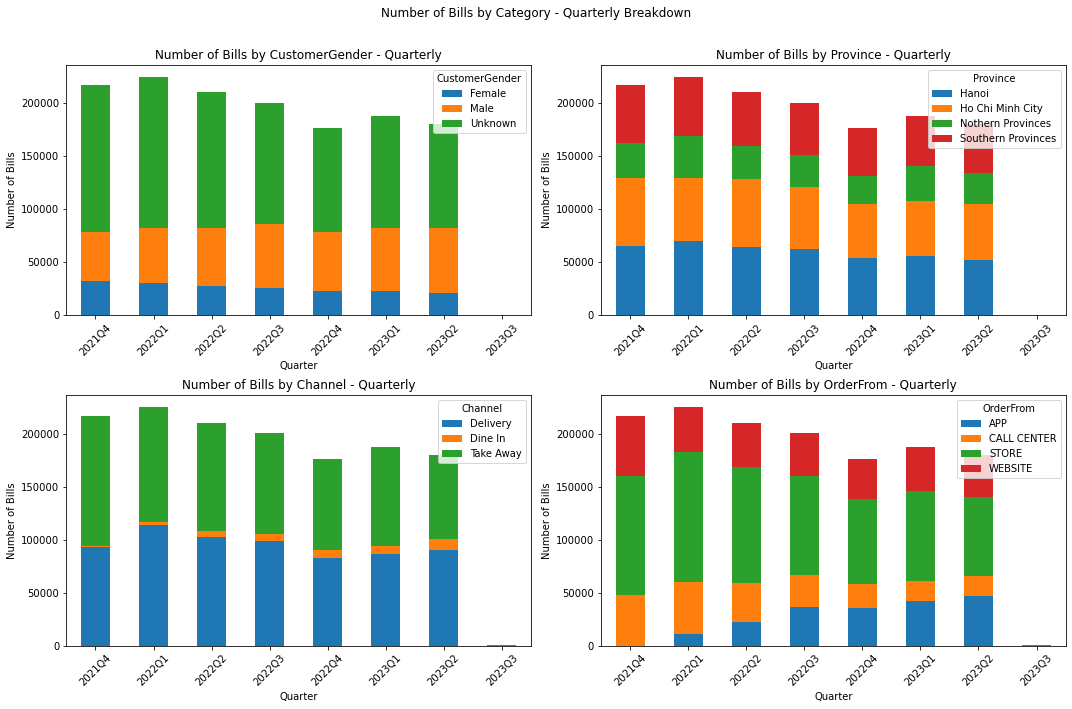

In [23]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.to_period('M')
df['Quarter'] = df['TransactionDate'].dt.to_period('Q')

categories = ['CustomerGender', 'Province', 'Channel', 'OrderFrom']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Number of Bills by Category - Monthly Breakdown')

for ax, category in zip(axes.flatten(), categories):
    monthly_data = df.groupby(['Month', category]).size().unstack().fillna(0)
    
    monthly_data.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Number of Bills by {category} - Monthly')
    ax.set_ylabel('Number of Bills')
    ax.set_xlabel('Month')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Number of Bills by Category - Quarterly Breakdown')

for ax, category in zip(axes.flatten(), categories):
    quarterly_data = df.groupby(['Quarter', category]).size().unstack().fillna(0)
    
    quarterly_data.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Number of Bills by {category} - Quarterly')
    ax.set_ylabel('Number of Bills')
    ax.set_xlabel('Quarter')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


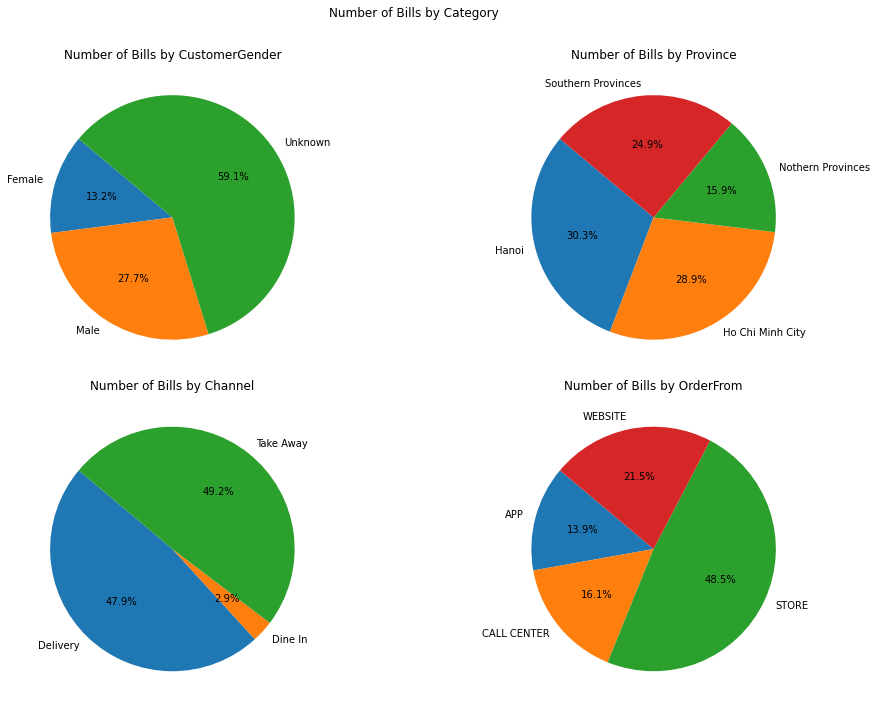

In [25]:
categories = ['CustomerGender', 'Province', 'Channel', 'OrderFrom']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Number of Bills by Category')

for ax, category in zip(axes.flatten(), categories):
    bill_count = df.groupby(category).size()

    ax.pie(bill_count, labels=bill_count.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Number of Bills by {category}')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

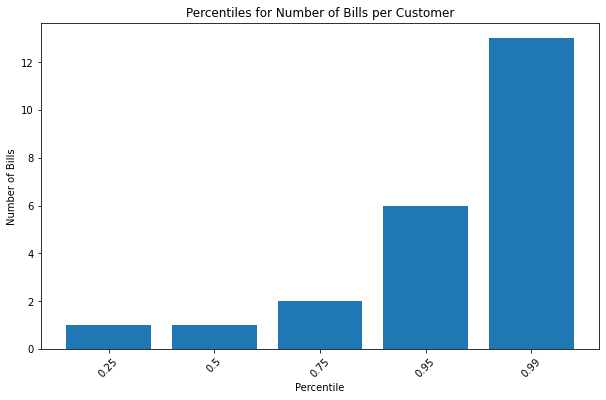

In [27]:
bills_per_customer = df.groupby('CustomerID').size()

percentiles = [0.25, 0.5, 0.75, 0.95, 0.99] 
percentile_values = bills_per_customer.quantile(percentiles)

percentile_data = pd.DataFrame({'Percentile': percentiles, 'Number of Bills': percentile_values.values})

plt.figure(figsize=(10, 6))
plt.bar(x=percentile_data['Percentile'].astype(str), height=percentile_data['Number of Bills'])
plt.title('Percentiles for Number of Bills per Customer')
plt.xlabel('Percentile')
plt.ylabel('Number of Bills')
plt.xticks(rotation=45)
plt.show()

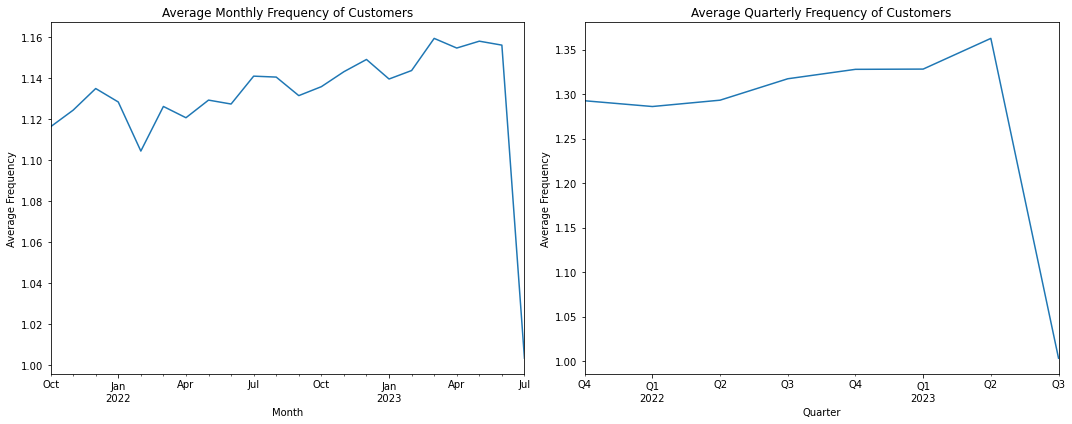

In [28]:
# Average Frequency of Customers
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.to_period('M')
df['Quarter'] = df['TransactionDate'].dt.to_period('Q')

monthly_frequency = df.groupby(['CustomerID', 'Month']).size().groupby('Month').mean()

quarterly_frequency = df.groupby(['CustomerID', 'Quarter']).size().groupby('Quarter').mean()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
monthly_frequency.plot(kind='line')
plt.title('Average Monthly Frequency of Customers')
plt.xlabel('Month')
plt.ylabel('Average Frequency')

plt.subplot(1, 2, 2)
quarterly_frequency.plot(kind='line')
plt.title('Average Quarterly Frequency of Customers')
plt.xlabel('Quarter')
plt.ylabel('Average Frequency')

plt.tight_layout()
plt.show()


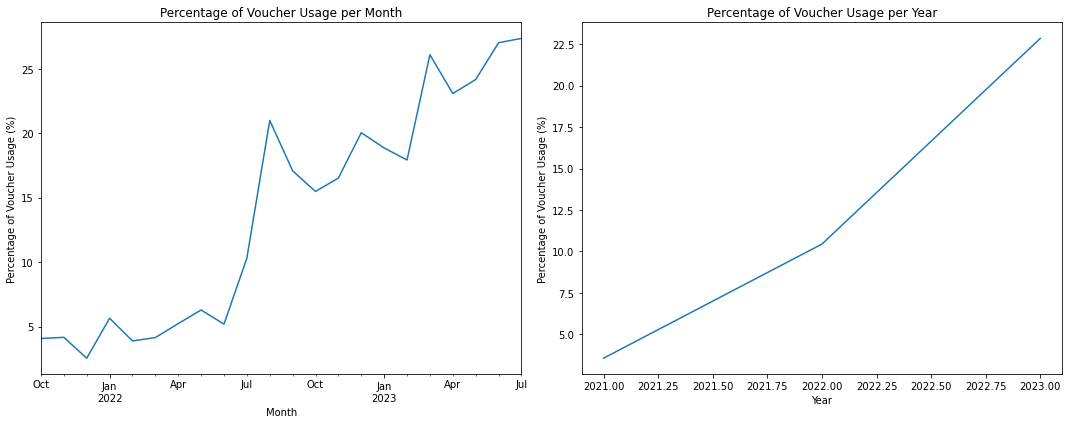

In [35]:
# %Voucher use in month, quarter.
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.to_period('M')
df['Year'] = df['TransactionDate'].dt.year

df['VoucherUsed'] = df['VoucherStatus'].apply(lambda x: 1 if x == 'Yes' else 0)

monthly_voucher_use = df.groupby('Month')['VoucherUsed'].mean() * 100

yearly_voucher_use = df.groupby('Year')['VoucherUsed'].mean() * 100

# Plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
monthly_voucher_use.plot(kind='line')
plt.title('Percentage of Voucher Usage per Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Voucher Usage (%)')

plt.subplot(1, 2, 2)
yearly_voucher_use.plot(kind='line')
plt.title('Percentage of Voucher Usage per Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Voucher Usage (%)')

plt.tight_layout()
plt.show()
